In [45]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

.. 5


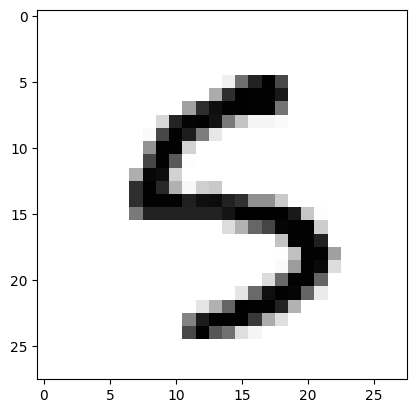

In [9]:
hinh = train_images[15000]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[15000])

In [46]:
from keras import models
from keras.layers import Dense
from keras.models.cloning import Sequential
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np

from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt

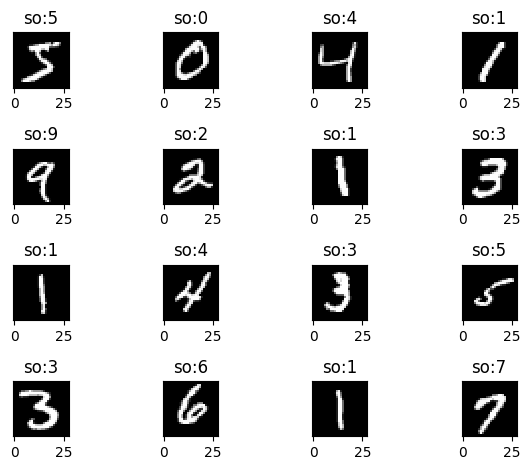

In [11]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks
  plt.yticks([])

In [47]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,)))
model.add(Dense(10,activation='softmax',name='layout_1'))
  
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 layout_1 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [48]:
train_images=train_images.reshape((60000,28*28)) 
train_images=train_images.astype('float32')/255 
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255
  # one hot encoding 
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [49]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Accuracy: ',test_acc)
print('Lost: ',test_loss)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2642 - accuracy: 0.9239
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1085 - accuracy: 0.9670
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0519 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0383 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0291 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0171 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0129 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.

In [50]:
model.save('MNIST_DATA.h5')


In [51]:
model11 = load_model('MNIST_DATA.h5')
model11.summary()
print(model11.predict([test_images]))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 layout_1 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
[[8.76077266e-11 1.89741192e-12 4.07329503e-09 ... 9.99997795e-01
  7.95866750e-09 5.68784948e-08]
 [3.54378527e-10 7.17919875e-07 9.99998987e-01 ... 4.97386323e-16
  2.58599101e-07 1.18386449e-15]
 [5.92769034e-08 9.99615252e-01 1.97322497e-05 ... 1.68703802e-04
  1.81434487e-04 8.29803355e-08]
 ...
 [2.96676036e-17 1.43471454e-12 5.32926819e-16 ... 6.05706845e-08
  3.85079568e-09 3.10

1/1 [==============================] - 0s 90ms/step
Giá trị dự đoán:  5


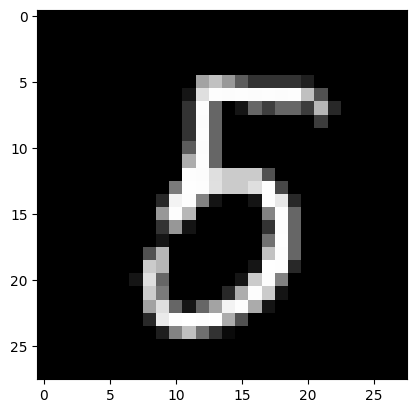

In [52]:
plt.imshow(test_images[45].reshape(28,28), cmap='gray')
y_predict = model11.predict(test_images[45].reshape(1,28*28))
print('Giá trị dự đoán: ', np.argmax(y_predict))

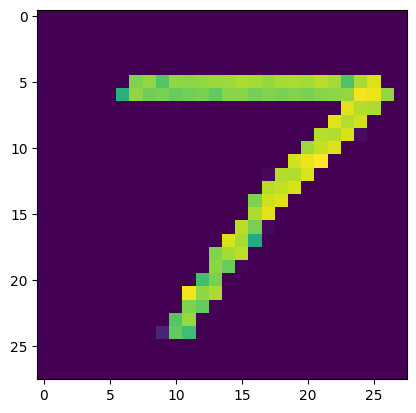

In [57]:
img = load_img(r'SO9.jpg', target_size=(28,28))
img = img.convert('L')
plt.imshow(img)

In [58]:
model1 = load_model('MNIST_DATA.h5')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255

np.argmax(model1.predict(img),axis = -1)

1/1 [==============================] - 0s 54ms/step


array([7])